In [1]:
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.preprocessing import MinMaxScaler as mns

from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs

from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Lasso as L
from sklearn.linear_model import ElasticNet as en

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn

In [2]:
from sklearn.metrics import mean_squared_error, r2_score as r2
from sklearn import model_selection as mods
from sklearn.svm import SVR as svr

In [3]:
from sklearn.model_selection import train_test_split as tts

In [4]:
import seaborn as sns

In [5]:
import json as js #first imported all the necessary modules
import csv

In [6]:
import time
import datetime

In [7]:
from sklearn.preprocessing import StandardScaler as st

In [8]:
from sklearn.ensemble import GradientBoostingRegressor as gbr


In [9]:
with open(r"C:\Users\TISYAGUPTA PYNE\Desktop\Intradayprice.json") as f:
    dataset=js.load(f)

In [10]:
dataset

[{'date': '2020-10-09',
  'minute': '09:30',
  'label': '09:30 AM',
  'high': 115.35,
  'low': 115.035,
  'open': 115.28,
  'close': 115.13,
  'average': 115.234,
  'volume': 16915,
  'notional': 1949189.465,
  'numberOfTrades': 123},
 {'date': '2020-10-09',
  'minute': '09:31',
  'label': '09:31 AM',
  'high': 115.16,
  'low': 115.02,
  'open': 115.155,
  'close': 115.07,
  'average': 115.101,
  'volume': 11659,
  'notional': 1341960.66,
  'numberOfTrades': 64},
 {'date': '2020-10-09',
  'minute': '09:32',
  'label': '09:32 AM',
  'high': 115.11,
  'low': 114.96,
  'open': 115,
  'close': 115.11,
  'average': 115.042,
  'volume': 10667,
  'notional': 1227152.01,
  'numberOfTrades': 63},
 {'date': '2020-10-09',
  'minute': '09:33',
  'label': '09:33 AM',
  'high': 115.335,
  'low': 115.01,
  'open': 115.11,
  'close': 115.33,
  'average': 115.143,
  'volume': 11281,
  'notional': 1298925.58,
  'numberOfTrades': 79},
 {'date': '2020-10-09',
  'minute': '09:34',
  'label': '09:34 AM',
  

In [11]:
data_file = open('data_file.csv', 'w') 
  
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
 
count = 0
  
for i in dataset: 
    if count == 0: 
        # Writing headers of CSV file 
        header = i.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(i.values()) 
    
data_file.close() 

In [12]:
data=pd.read_csv('data_file.csv')

In [13]:
data

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades
0,2020-10-09,09:30,09:30 AM,115.350,115.035,115.280,115.130,115.234,16915,1949189.465,123
1,2020-10-09,09:31,09:31 AM,115.160,115.020,115.155,115.070,115.101,11659,1341960.660,64
2,2020-10-09,09:32,09:32 AM,115.110,114.960,115.000,115.110,115.042,10667,1227152.010,63
3,2020-10-09,09:33,09:33 AM,115.335,115.010,115.110,115.330,115.143,11281,1298925.580,79
4,2020-10-09,09:34,09:34 AM,115.430,115.230,115.260,115.430,115.313,18285,2108499.520,113
...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-09,15:55,3:55 PM,116.795,116.680,116.705,116.790,116.752,24051,2808014.440,147
386,2020-10-09,15:56,3:56 PM,116.875,116.795,116.795,116.870,116.839,19853,2319610.405,139
387,2020-10-09,15:57,3:57 PM,116.930,116.855,116.860,116.925,116.888,24012,2806715.555,180
388,2020-10-09,15:58,3:58 PM,116.960,116.905,116.910,116.950,116.931,45061,5269020.560,190


In [14]:
array=data.values

In [15]:
array

array([['2020-10-09', '09:30', '09:30 AM', ..., 16915, 1949189.465, 123],
       ['2020-10-09', '09:31', '09:31 AM', ..., 11659, 1341960.66, 64],
       ['2020-10-09', '09:32', '09:32 AM', ..., 10667, 1227152.01, 63],
       ...,
       ['2020-10-09', '15:57', '3:57 PM', ..., 24012, 2806715.555, 180],
       ['2020-10-09', '15:58', '3:58 PM', ..., 45061, 5269020.56, 190],
       ['2020-10-09', '15:59', '3:59 PM', ..., 18431, 2155988.285, 62]],
      dtype=object)

In [16]:
x=array[: , 0:11]
y=array[: , 10]

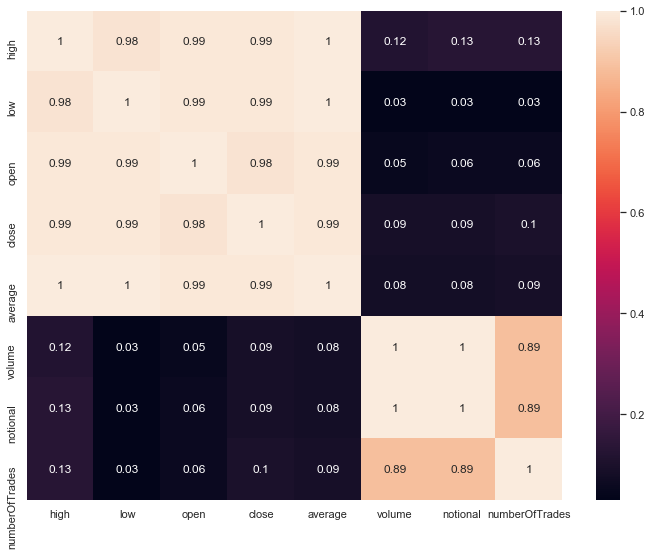

In [17]:
#drawing heatmap

corr_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})

sns.heatmap(data=corr_matrix, annot=True)

In [18]:
dataframe=df(data)

In [19]:
s = dataframe['date']
string=np.array(s)

timestamp=[]

for i in string:
    element = datetime.datetime.strptime(i ,"%Y-%m-%d")
    time = datetime.datetime.timestamp(element)
    timestamp.append(time)

In [20]:
mint=dataframe['minute']
mint=np.array(mint)

In [21]:
hour=[] 
mins=[] 

for i in mint:
    h,m = i.split(':')
    hour.append(int(h))
    mins.append(int(m))

In [22]:
hour=np.array(hour)
mins=np.array(mins)

In [23]:
hour=hour*60

In [24]:
t=hour+mins

In [25]:
#adding the minutes to the dates

fin=t+timestamp

In [26]:
dataframe['timestamp']= fin

In [27]:
dataframe

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades,timestamp
0,2020-10-09,09:30,09:30 AM,115.350,115.035,115.280,115.130,115.234,16915,1949189.465,123,1.602182e+09
1,2020-10-09,09:31,09:31 AM,115.160,115.020,115.155,115.070,115.101,11659,1341960.660,64,1.602182e+09
2,2020-10-09,09:32,09:32 AM,115.110,114.960,115.000,115.110,115.042,10667,1227152.010,63,1.602182e+09
3,2020-10-09,09:33,09:33 AM,115.335,115.010,115.110,115.330,115.143,11281,1298925.580,79,1.602182e+09
4,2020-10-09,09:34,09:34 AM,115.430,115.230,115.260,115.430,115.313,18285,2108499.520,113,1.602182e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-09,15:55,3:55 PM,116.795,116.680,116.705,116.790,116.752,24051,2808014.440,147,1.602183e+09
386,2020-10-09,15:56,3:56 PM,116.875,116.795,116.795,116.870,116.839,19853,2319610.405,139,1.602183e+09
387,2020-10-09,15:57,3:57 PM,116.930,116.855,116.860,116.925,116.888,24012,2806715.555,180,1.602183e+09
388,2020-10-09,15:58,3:58 PM,116.960,116.905,116.910,116.950,116.931,45061,5269020.560,190,1.602183e+09


In [28]:
#creating dataframe

datas= df(dataframe[['timestamp', 'open']])


In [29]:
datas

,timestamp,open
0,1.602182e+09,115.280
1,1.602182e+09,115.155
2,1.602182e+09,115.000
3,1.602182e+09,115.110
4,1.602182e+09,115.260
...,...,...
385,1.602183e+09,116.705
386,1.602183e+09,116.795
387,1.602183e+09,116.860
388,1.602183e+09,116.910


In [30]:
x=datas.iloc[:, 0]
y=datas.iloc[: , 1]

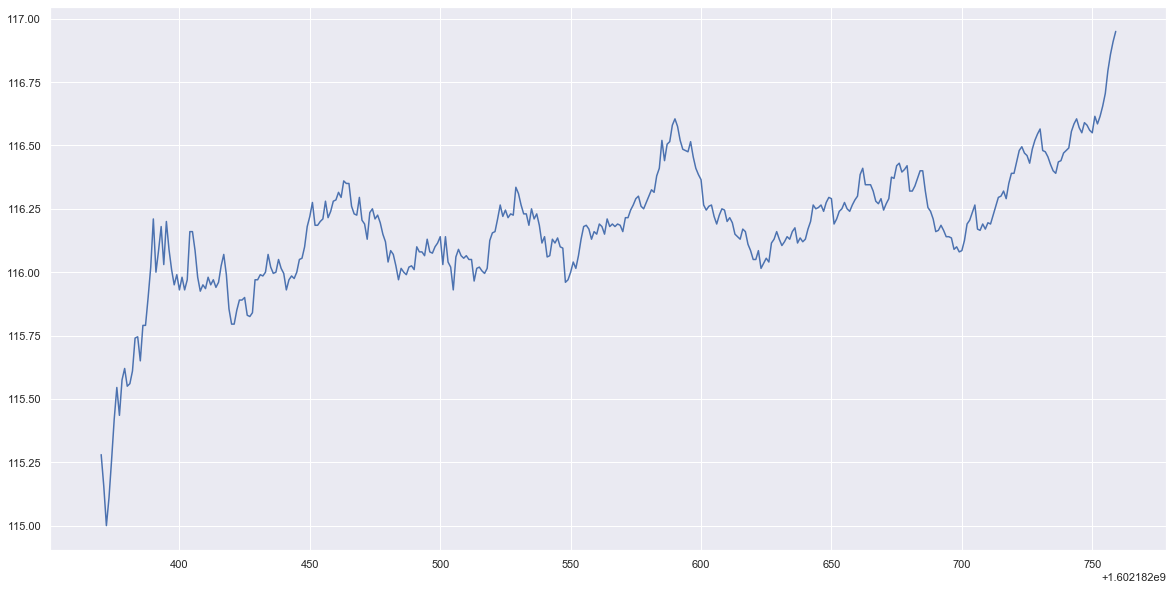

In [32]:
plt.plot(x,y)
plt.rcParams['figure.figsize']=(20,10)


In [33]:
#validation
rx=np.array(x).reshape(-1,1)

val_size = 0.20
seed = 4
x_train, x_val, y_train, y_val = tts(rx, y, test_size=val_size, random_state=seed)

In [34]:
num_folds=3
seed =1
scoring='r2'

In [35]:
models=[('LR', lr()), ('Lasso', L()), ('ElasticNet', en()), ('KNN', knn()), ('CART', dtr()), ("SVR", svr())]

In [36]:
result=[]
names=[]

for name, model in models:
    kfold= kf(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_res=cvs(model, x_train, y_train, cv=kfold, scoring = scoring)
    result.append(cv_res)
    names.append(name)
    
    msg= "%s : %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print (msg)

LR : 0.513898 (0.031982)
Lasso : 0.513239 (0.027652)
ElasticNet : 0.513888 (0.029754)
KNN : 0.928125 (0.002227)
CART : 0.508188 (0.011507)
SVR : -20.701151 (1.035249)


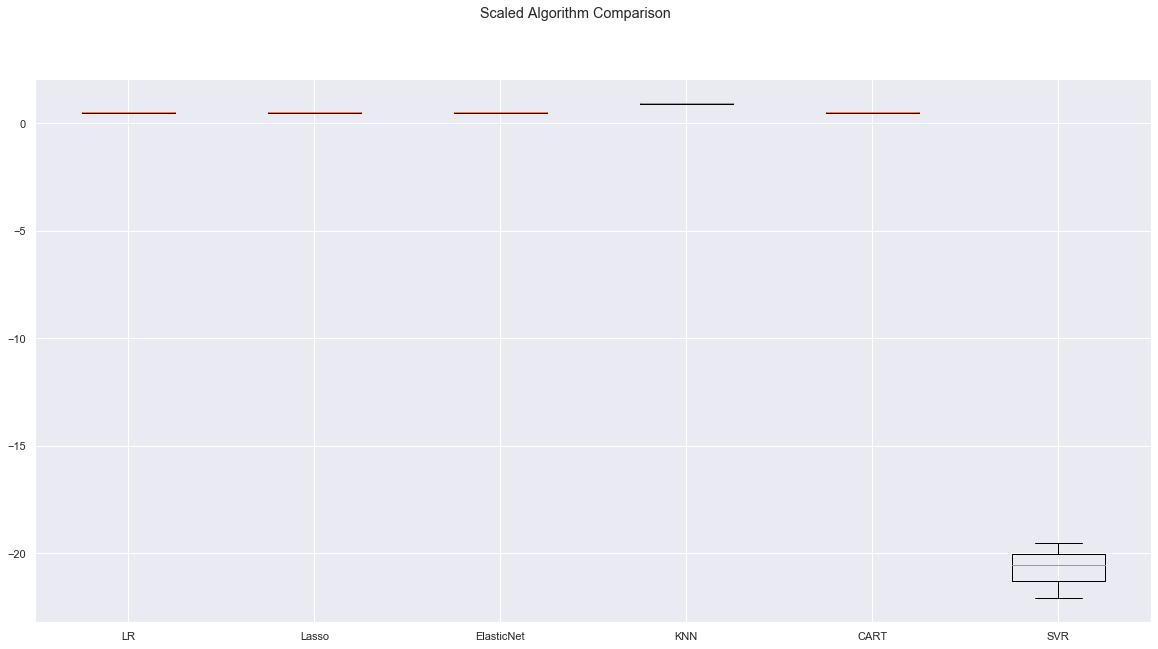

In [37]:
fig = plt.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

plt.rcParams['figure.figsize']=(20,30)

#algorithm comparison

In [38]:
#used k nearest neighbours

model = knn(n_neighbors=5)

model.fit(x_train, y_train)

predict = model.predict(x_val)
print(r2(y_val, predict))

0.9487139113905734


In [39]:
#used sklearn.ensemble to import GradientBoostingRegressor as gbr

scaler = st().fit(x_train)
rescaledx = scaler.transform(x_train)
model = gbr(random_state=seed, n_estimators=100)
model.fit(rescaledx, y_train)

rescaledValidationx = scaler.transform(x_val)
predictions = model.predict(rescaledValidationx)
print(r2(y_val, predictions))

0.9307642441674376


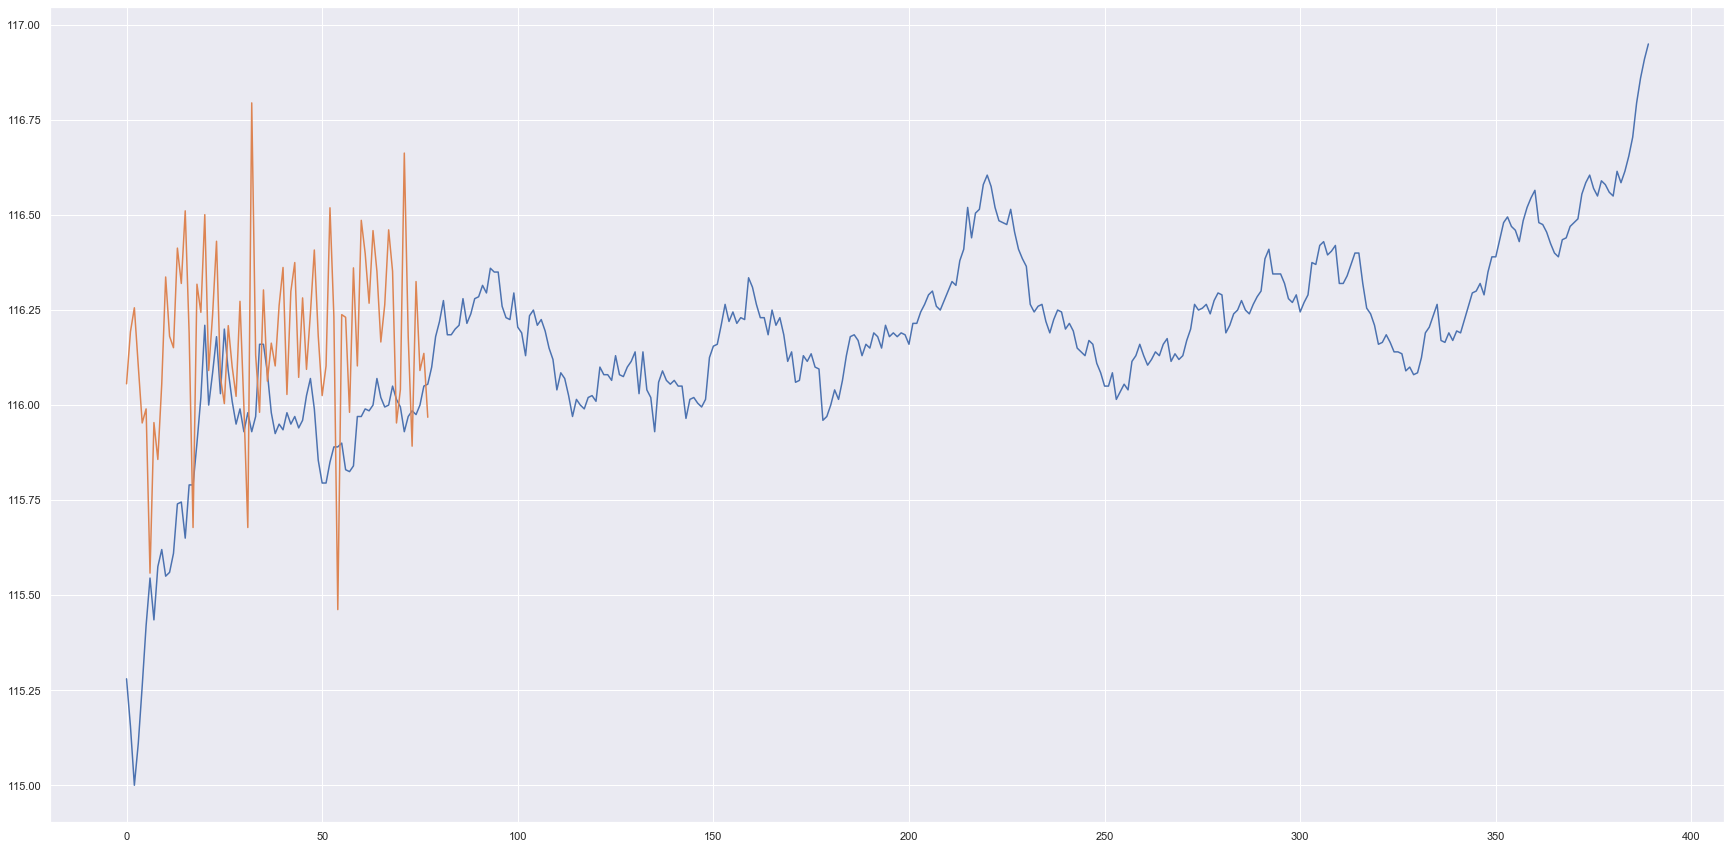

In [41]:
plt.plot(y)
plt.plot(predict)

plt.rcParams['figure.figsize']=(30,15)

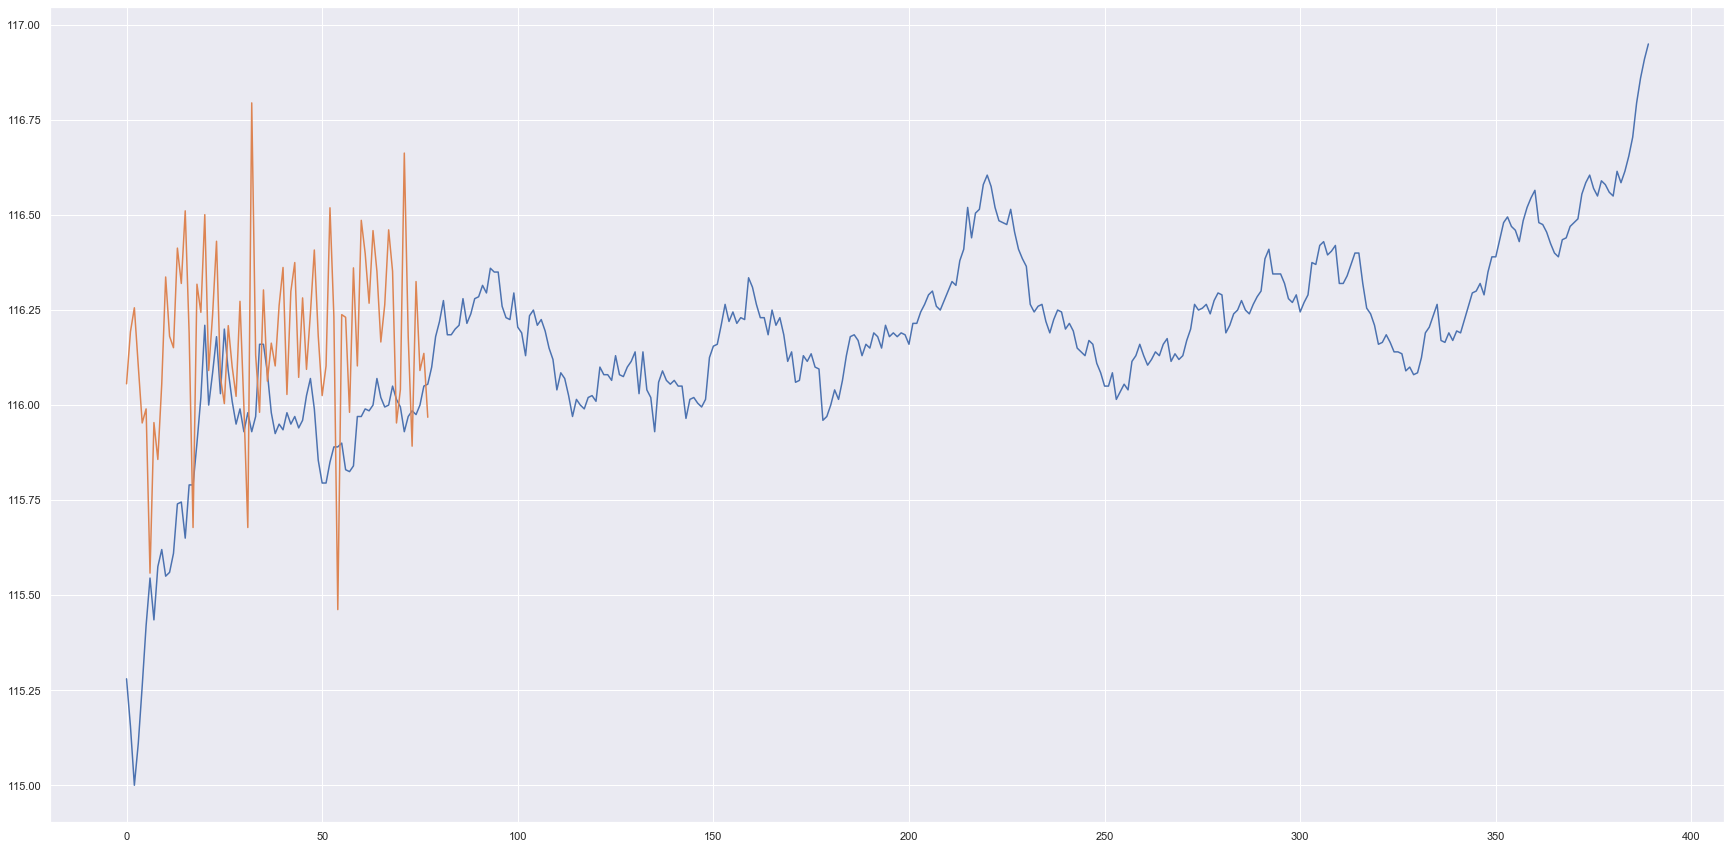

In [42]:
ry=np.array(y).reshape(-1,1)

plt.plot(ry)
plt.plot(predict)
plt.rcParams['figure.figsize']=(30,15)

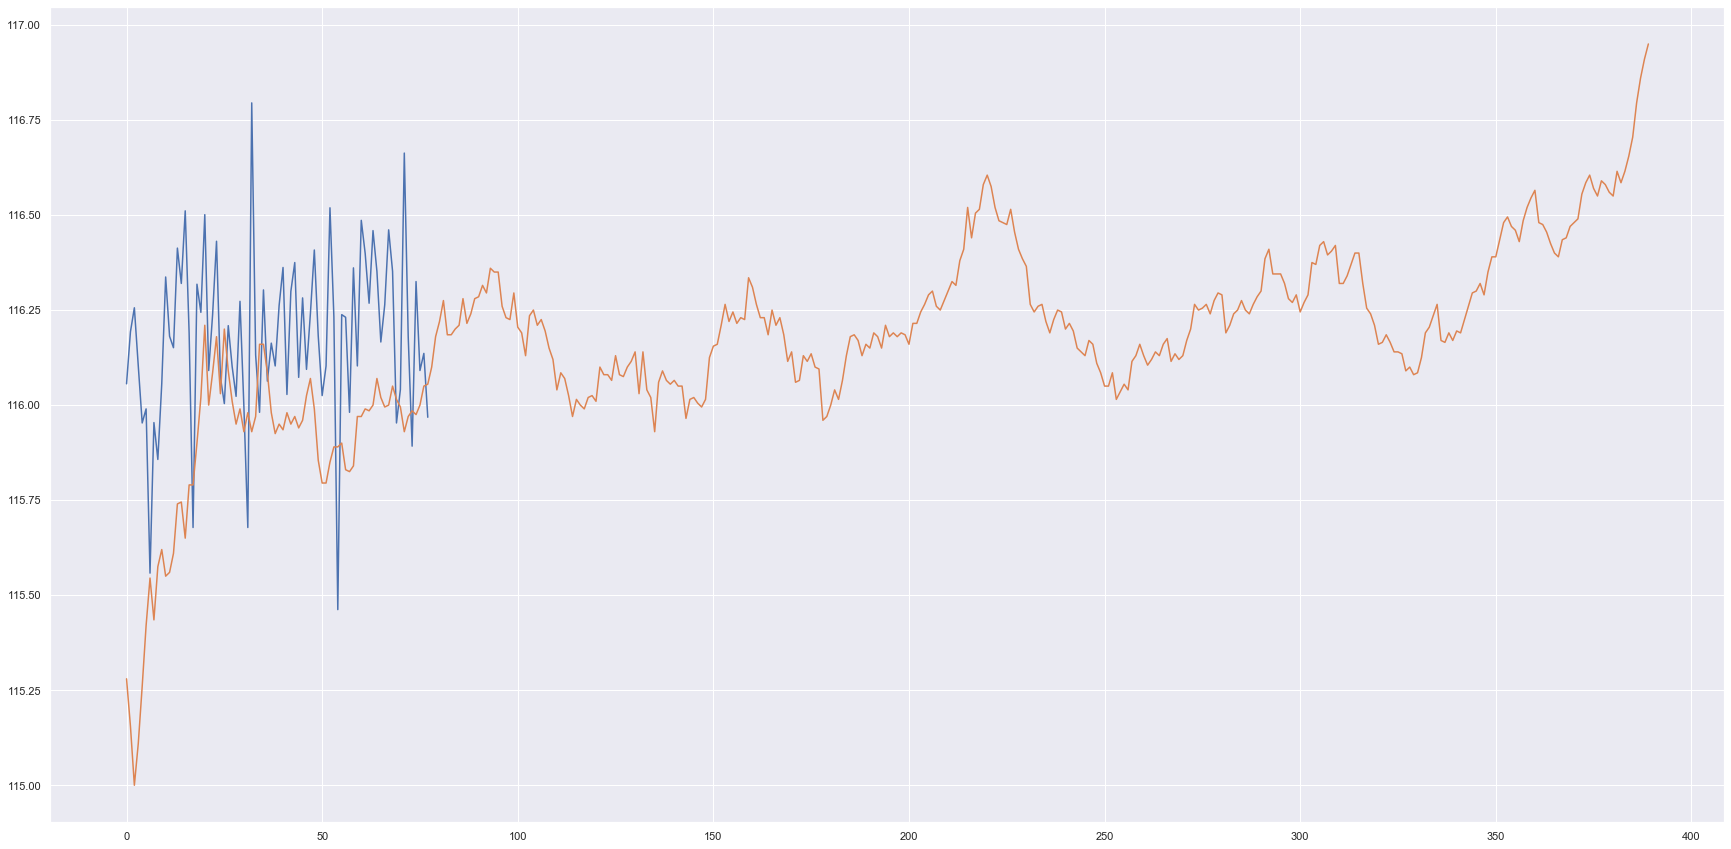

In [43]:
plt.plot(predict)
plt.plot(ry)
plt.rcParams['figure.figsize']=(30,15)

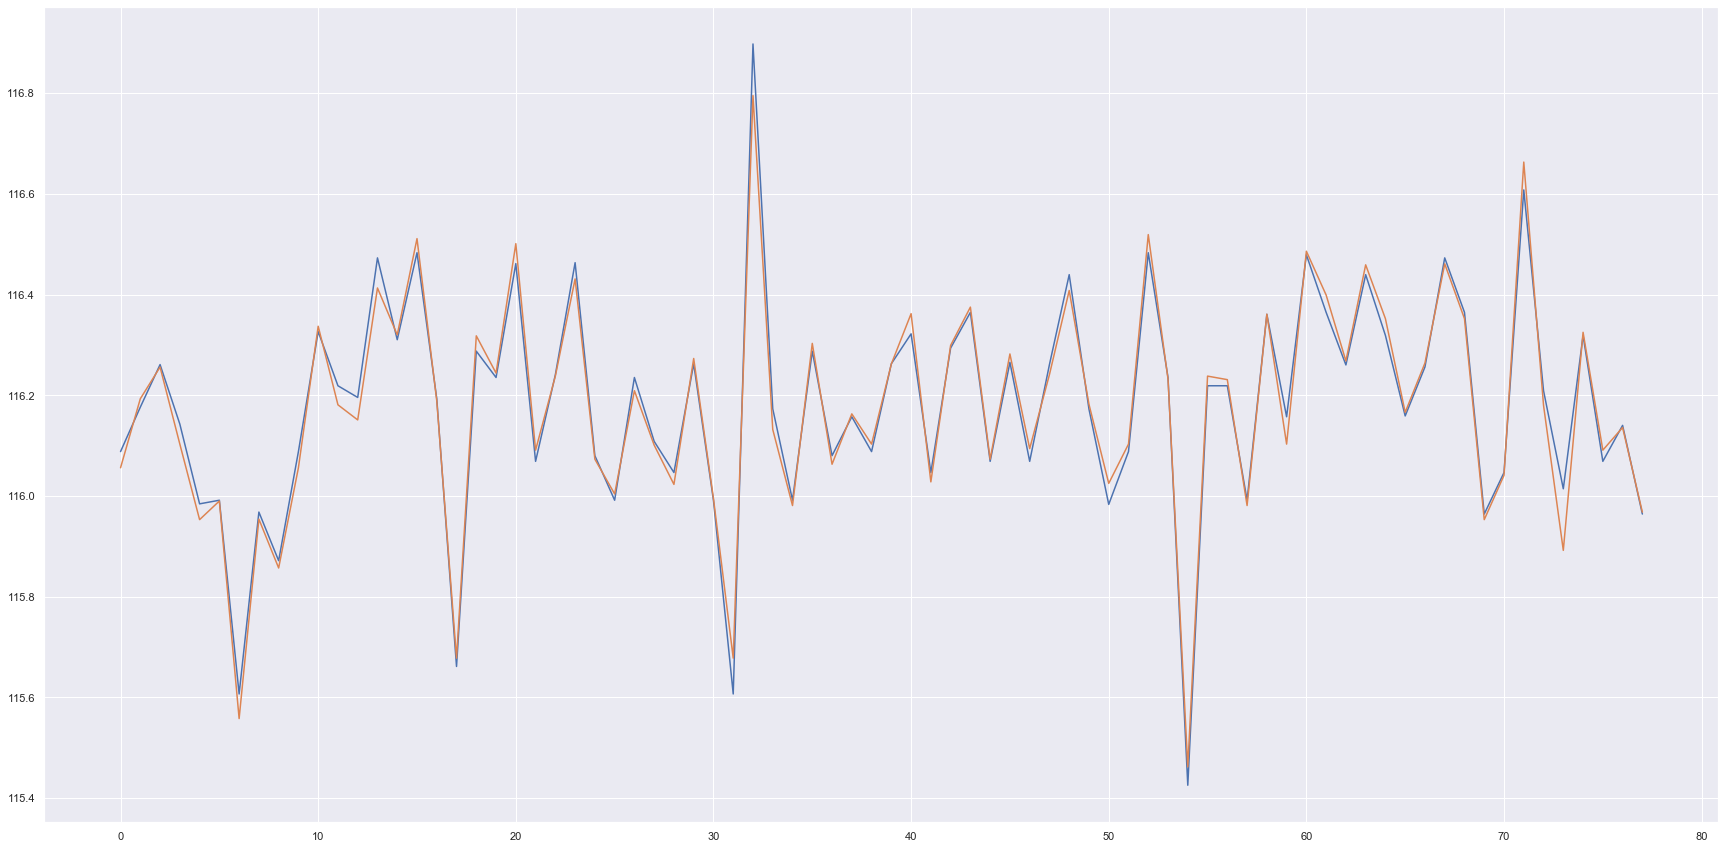

In [44]:
plt.plot(predictions)
plt.plot(predict)

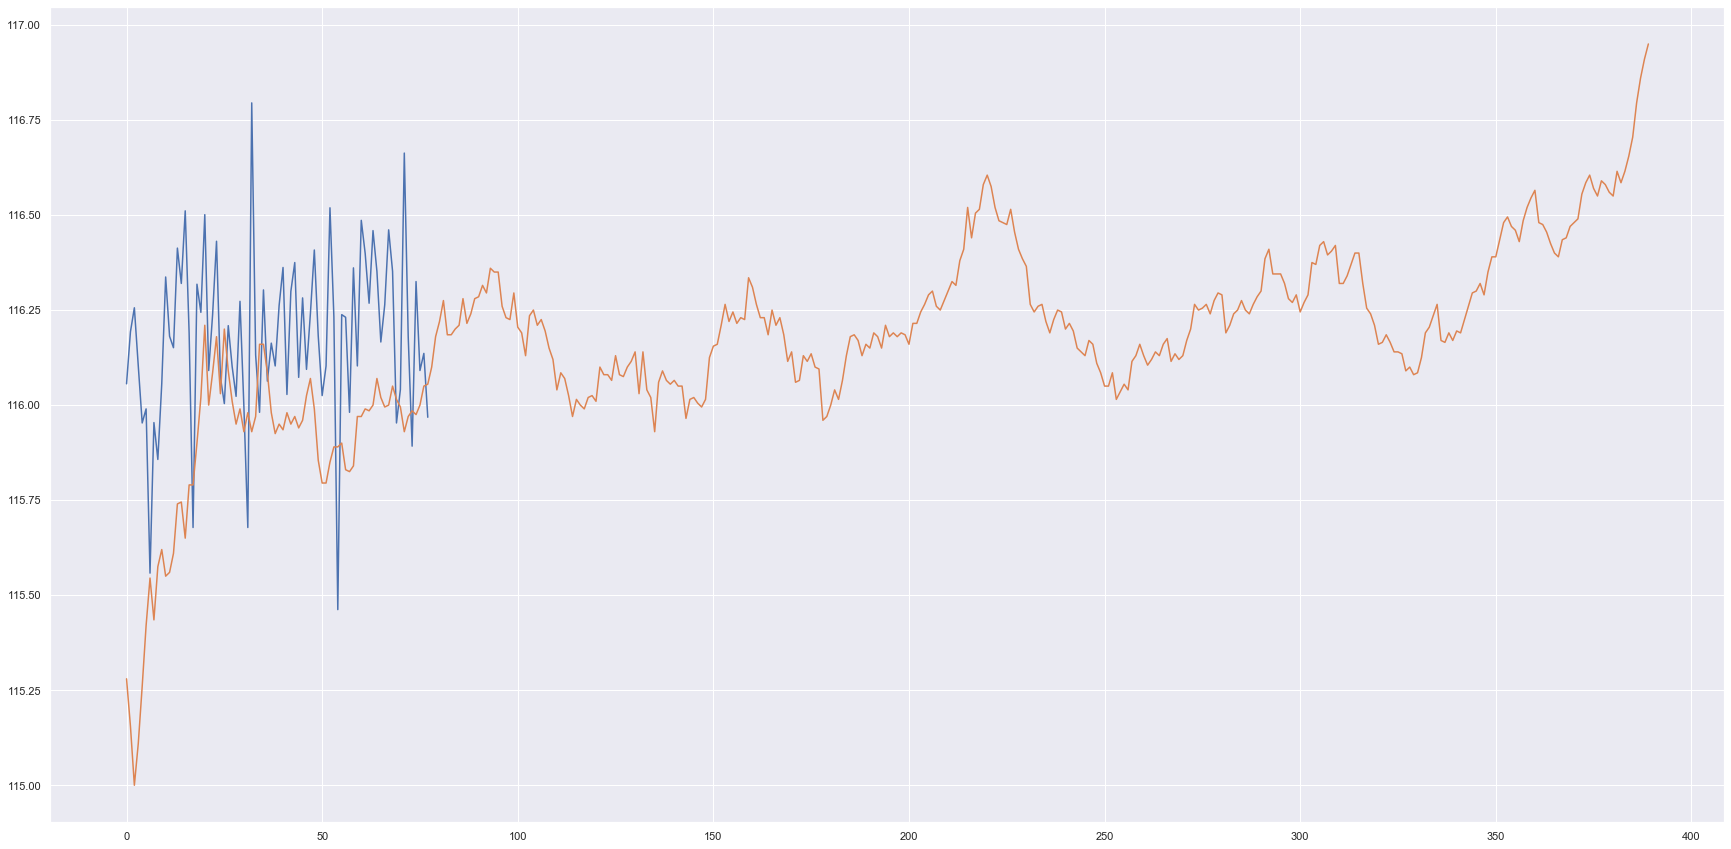

In [47]:
#using a minmax scaling

plt.plot(predict)
plt.plot(ry)